In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clean Datasets Filmindonesia.com

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data setelah dibersihkan dan filtering: 1429

Genre yang tersisa (jumlah film >= 7):
Drama: 779 film
Horor: 444 film
Komedi: 177 film
Laga: 30 film

Data telah disimpan di: /content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_filmindonesia_movie_data.csv


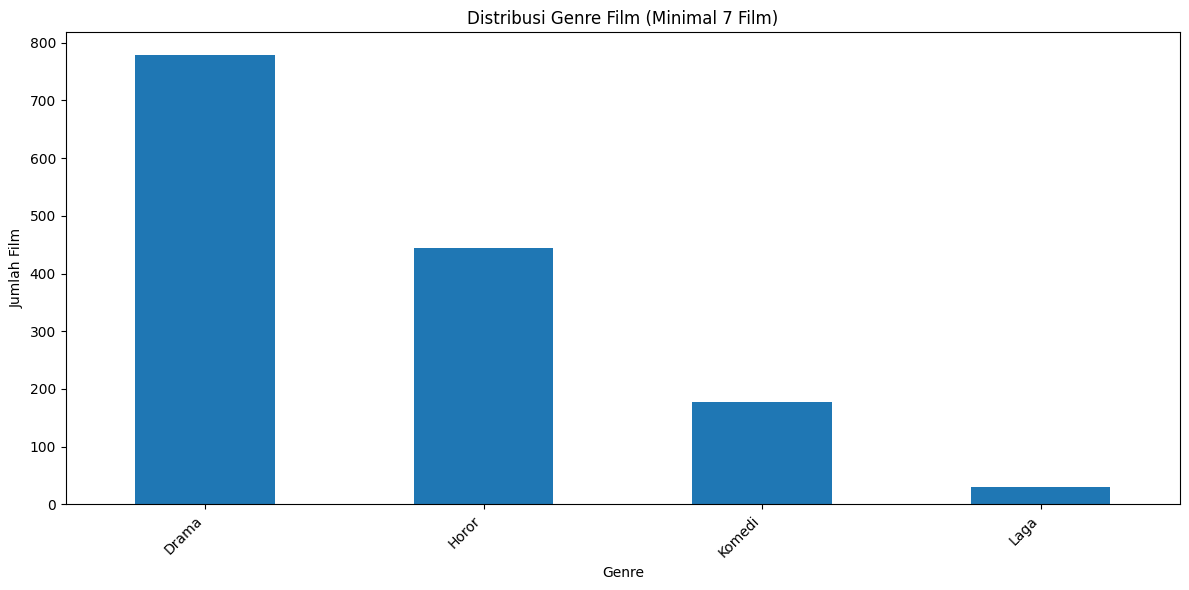

In [ ]:


import pandas as pd
import numpy as np

# Baca file dari Google Drive
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Datasets/film_indonesia_dataset.csv')

# Fungsi untuk membersihkan data dan memfilter genre
def clean_and_filter_genres(df, min_movies=7):
    # Pilih kolom yang diinginkan
    cleaned_df = df[['judul', 'genre', 'description']]

    # Rename kolom deskripsi menjadi sinopsis
    cleaned_df = cleaned_df.rename(columns={'description': 'sinopsis'})

    # Hapus baris yang mengandung nilai null
    cleaned_df = cleaned_df.dropna()

    # Hapus baris dimana genre atau sinopsis kosong/whitespace
    cleaned_df = cleaned_df[cleaned_df['genre'].str.strip() != '']
    cleaned_df = cleaned_df[cleaned_df['sinopsis'].str.strip() != '']

    # Bersihkan genre
    def clean_genre(genre_string):
        # Hapus karakter khusus dan standardisasi
        genres = genre_string.split('|')
        cleaned_genres = []
        for genre in genres:
            # Bersihkan setiap genre
            cleaned_genre = genre.strip()
            # Hapus tanda kutip, kurung siku, dan tanda koma
            cleaned_genre = cleaned_genre.replace("'", "").replace('"', "").replace('[', '').replace(']', '').replace(',', '')
            # Hapus kata 'atau'
            if cleaned_genre.lower() != 'atau' and 'atau' not in cleaned_genre.lower():
                # Standardisasi format genre yang sama
                if 'Komedi' in cleaned_genre:
                    cleaned_genre = 'Komedi'
                elif 'Drama' in cleaned_genre:
                    cleaned_genre = 'Drama'
                elif 'Horor' in cleaned_genre:
                    cleaned_genre = 'Horor'
                cleaned_genres.append(cleaned_genre)
        return ' | '.join(filter(None, cleaned_genres))

    # Terapkan pembersihan genre
    cleaned_df['genre'] = cleaned_df['genre'].apply(clean_genre)

    # Hapus baris yang mungkin kosong setelah pembersihan
    cleaned_df = cleaned_df[cleaned_df['genre'] != '']

    # Analisis Genre
    all_genres = cleaned_df['genre'].str.split(' | ').explode()

    # Hitung frekuensi setiap genre
    genre_counts = all_genres.value_counts()

    # Filter genre yang memiliki jumlah film >= min_movies
    valid_genres = genre_counts[genre_counts >= min_movies].index.tolist()

    # Filter dataset untuk hanya menyimpan film dengan genre yang valid
    filtered_df = cleaned_df.copy()
    mask = filtered_df['genre'].apply(lambda x: any(genre in valid_genres for genre in x.split(' | ')))
    filtered_df = filtered_df[mask]

    # Update genre dengan hanya menggunakan genre yang valid
    filtered_df['genre'] = filtered_df['genre'].apply(
        lambda x: ' | '.join([g for g in x.split(' | ') if g in valid_genres])
    )

    # Hapus film yang mungkin tidak memiliki genre setelah filtering
    filtered_df = filtered_df[filtered_df['genre'] != '']

    # Reset index
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df, genre_counts[genre_counts >= min_movies]

# Bersihkan dan filter data
cleaned_df, filtered_genre_counts = clean_and_filter_genres(df, min_movies=7)

# Tampilkan hasil
print("Jumlah data setelah dibersihkan dan filtering:", len(cleaned_df))

print("\nGenre yang tersisa (jumlah film >= 7):")
for genre, count in filtered_genre_counts.items():
    print(f"{genre}: {count} film")

# Simpan hasil ke Google Drive
output_path = '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_filmindonesia_movie_data.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"\nData telah disimpan di: {output_path}")

# Visualisasi distribusi genre yang tersisa
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar')
plt.title('Distribusi Genre Film (Minimal 7 Film)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clean Datasets themoviedb.org

Jumlah data setelah dibersihkan dan filtering: 878

Genre yang tersisa (jumlah film >= 7):
Drama: 551 film
Komedi: 230 film
Percintaan: 206 film
Kengerian: 177 film
Cerita Seru: 74 film
Aksi: 62 film
Misteri: 49 film
Keluarga: 49 film
Kejahatan: 45 film
Dokumenter: 30 film
Musik: 29 film
Fantasi: 27 film
Petualangan: 26 film
Sejarah: 23 film
Cerita Fiksi: 21 film
Animasi: 8 film
Film TV: 7 film

Data telah disimpan di: /content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_tmdb_movie_data.csv


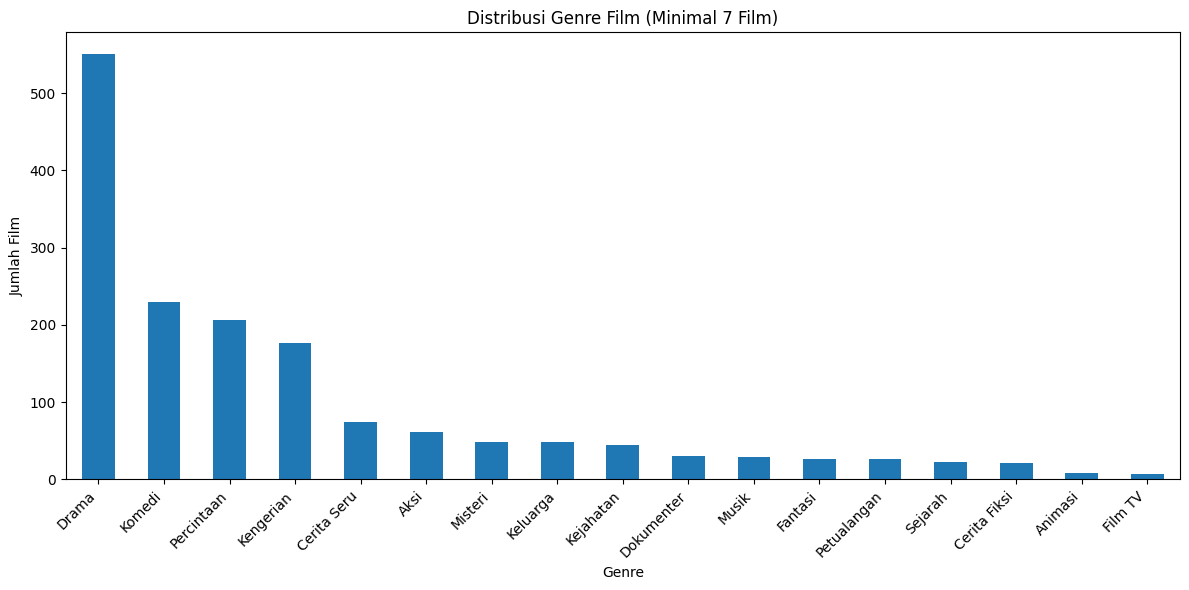

In [ ]:

import pandas as pd
import numpy as np

# Baca file dengan separator semicolon
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Datasets/tmdb_movies_dataset.csv', sep=';')

# Fungsi untuk membersihkan data dan memfilter genre
def clean_and_filter_genres(df, min_movies=7):
    # Pilih kolom yang diinginkan
    cleaned_df = df[['judul', 'genre', 'sinopsis']]

    # Hapus baris yang mengandung nilai null
    cleaned_df = cleaned_df.dropna()

    # Hapus baris dimana genre atau sinopsis kosong/whitespace
    cleaned_df = cleaned_df[cleaned_df['genre'].str.strip() != '']
    cleaned_df = cleaned_df[cleaned_df['sinopsis'].str.strip() != '']

    # Analisis Genre dengan memperhatikan format "Genre1 | Genre2" vs "Kata1 Kata2"
    def split_genres(genre_string):
        # Split berdasarkan " | " dan strip whitespace
        genres = [g.strip() for g in genre_string.split(' | ')]
        return genres

    # Mendapatkan semua genre unik
    all_genres = []
    for genre_string in cleaned_df['genre']:
        all_genres.extend(split_genres(genre_string))

    # Hitung frekuensi genre
    genre_counts = pd.Series(all_genres).value_counts()

    # Filter genre yang memiliki jumlah film >= min_movies
    valid_genres = genre_counts[genre_counts >= min_movies].index.tolist()

    # Filter dataset untuk hanya menyimpan film dengan genre yang valid
    filtered_df = cleaned_df.copy()
    mask = filtered_df['genre'].apply(lambda x: any(genre in valid_genres for genre in split_genres(x)))
    filtered_df = filtered_df[mask]

    # Update genre dengan hanya menggunakan genre yang valid
    filtered_df['genre'] = filtered_df['genre'].apply(
        lambda x: ' | '.join([g for g in split_genres(x) if g in valid_genres])
    )

    # Hapus film yang mungkin tidak memiliki genre setelah filtering
    filtered_df = filtered_df[filtered_df['genre'] != '']

    # Reset index
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df, genre_counts[genre_counts >= min_movies]

# Bersihkan dan filter data
cleaned_df, filtered_genre_counts = clean_and_filter_genres(df, min_movies=7)

# Tampilkan hasil
print("Jumlah data setelah dibersihkan dan filtering:", len(cleaned_df))

print("\nGenre yang tersisa (jumlah film >= 7):")
for genre, count in filtered_genre_counts.items():
    print(f"{genre}: {count} film")

# Simpan hasil ke Google Drive
output_path = '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_tmdb_movie_data.csv'
cleaned_df.to_csv(output_path, index=False, sep=';')
print(f"\nData telah disimpan di: {output_path}")

# Visualisasi distribusi genre yang tersisa
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar')
plt.title('Distribusi Genre Film (Minimal 7 Film)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clean Datasets imbd 1 (from kaggle)

Jumlah data setelah dibersihkan dan filtering: 810

Genre yang tersisa (jumlah film >= 7):
Drama: 308 film
Komedi: 173 film
Horor: 149 film
Action: 95 film
Petualangan: 43 film
Biografi: 27 film
Romance: 8 film
Crime: 7 film

Data telah disimpan di: /content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies.csv


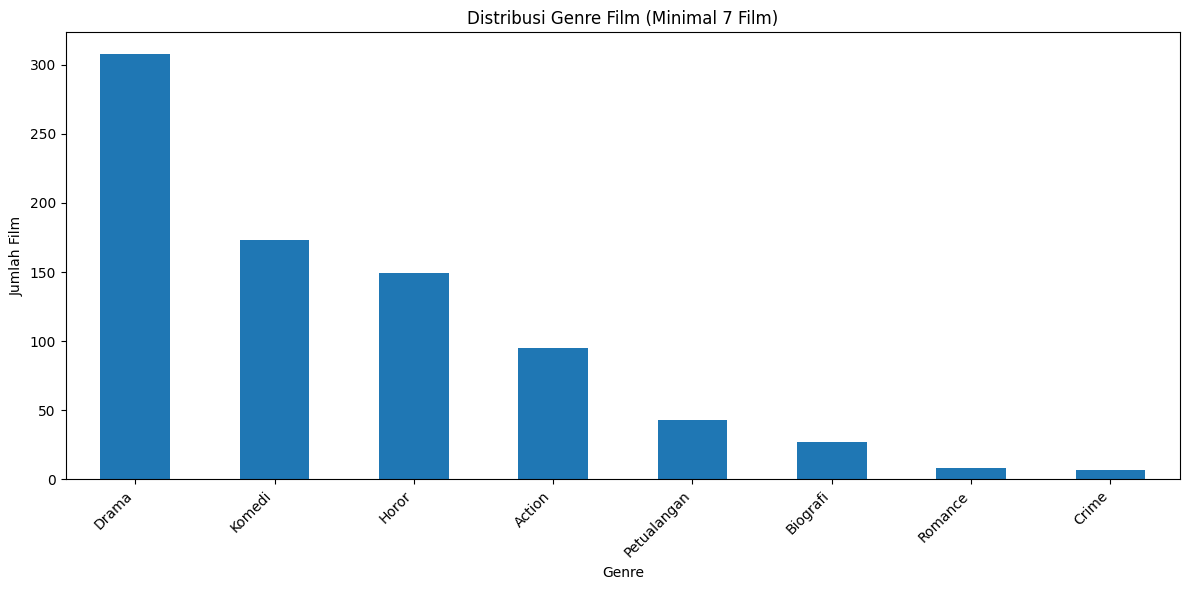

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Datasets/indonesian_movies.csv')

# Fungsi untuk membersihkan data dan memfilter genre
def clean_and_filter_genres(df, min_movies=7):
    # Pilih dan rename kolom yang diinginkan
    cleaned_df = df[['title', 'genre', 'description']].copy()
    cleaned_df = cleaned_df.rename(columns={
        'title': 'judul',
        'description': 'sinopsis'
    })

    # Hapus baris yang mengandung nilai null
    cleaned_df = cleaned_df.dropna()

    # Hapus baris dimana genre atau sinopsis kosong/whitespace
    cleaned_df = cleaned_df[cleaned_df['genre'].str.strip() != '']
    cleaned_df = cleaned_df[cleaned_df['sinopsis'].str.strip() != '']

    # Bersihkan genre
    def clean_genre(genre_string):
        # Hapus karakter khusus dan standardisasi
        if pd.isna(genre_string):
            return ''

        genres = str(genre_string).split('|')
        cleaned_genres = []
        for genre in genres:
            # Bersihkan setiap genre
            cleaned_genre = genre.strip()
            # Hapus tanda kutip, kurung siku, dan tanda koma
            cleaned_genre = cleaned_genre.replace("'", "").replace('"', "").replace('[', '').replace(']', '').replace(',', '')
            # Hapus kata 'atau'
            if cleaned_genre.lower() != 'atau' and 'atau' not in cleaned_genre.lower():
                # Standardisasi format genre yang sama
                if 'Comedy' in cleaned_genre:
                    cleaned_genre = 'Komedi'
                elif 'Drama' in cleaned_genre:
                    cleaned_genre = 'Drama'
                elif 'Horror' in cleaned_genre or 'Horor' in cleaned_genre:
                    cleaned_genre = 'Horor'
                elif 'Biography' in cleaned_genre:
                    cleaned_genre = 'Biografi'
                elif 'Thriller' in cleaned_genre:
                    cleaned_genre = 'Thriller'
                elif 'Adventure' in cleaned_genre:
                    cleaned_genre = 'Petualangan'
                cleaned_genres.append(cleaned_genre)
        return ' | '.join(filter(None, cleaned_genres))

    # Terapkan pembersihan genre
    cleaned_df['genre'] = cleaned_df['genre'].apply(clean_genre)

    # Hapus baris yang mungkin kosong setelah pembersihan
    cleaned_df = cleaned_df[cleaned_df['genre'] != '']

    # Analisis Genre
    all_genres = cleaned_df['genre'].str.split(' | ').explode()

    # Hitung frekuensi setiap genre
    genre_counts = all_genres.value_counts()

    # Filter genre yang memiliki jumlah film >= min_movies
    valid_genres = genre_counts[genre_counts >= min_movies].index.tolist()

    # Filter dataset untuk hanya menyimpan film dengan genre yang valid
    filtered_df = cleaned_df.copy()
    mask = filtered_df['genre'].apply(lambda x: any(genre in valid_genres for genre in x.split(' | ')))
    filtered_df = filtered_df[mask]

    # Update genre dengan hanya menggunakan genre yang valid
    filtered_df['genre'] = filtered_df['genre'].apply(
        lambda x: ' | '.join([g for g in x.split(' | ') if g in valid_genres])
    )

    # Hapus film yang mungkin tidak memiliki genre setelah filtering
    filtered_df = filtered_df[filtered_df['genre'] != '']

    # Reset index
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df, genre_counts[genre_counts >= min_movies]

# Bersihkan dan filter data
cleaned_df, filtered_genre_counts = clean_and_filter_genres(df, min_movies=7)

# Tampilkan hasil
print("Jumlah data setelah dibersihkan dan filtering:", len(cleaned_df))

print("\nGenre yang tersisa (jumlah film >= 7):")
for genre, count in filtered_genre_counts.items():
    print(f"{genre}: {count} film")

# Simpan hasil
output_path = '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"\nData telah disimpan di: {output_path}")

# Visualisasi distribusi genre yang tersisa
plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar')
plt.title('Distribusi Genre Film (Minimal 7 Film)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clean Datasets imdb 2 (from kaggle)

Jumlah data setelah dibersihkan dan filtering: 1005

Genre yang tersisa (jumlah film >= 7):
Drama: 202 film
Laga: 202 film
Komedi: 201 film
Horor: 200 film
Romantis: 200 film

Data telah disimpan di: /content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies_2.csv


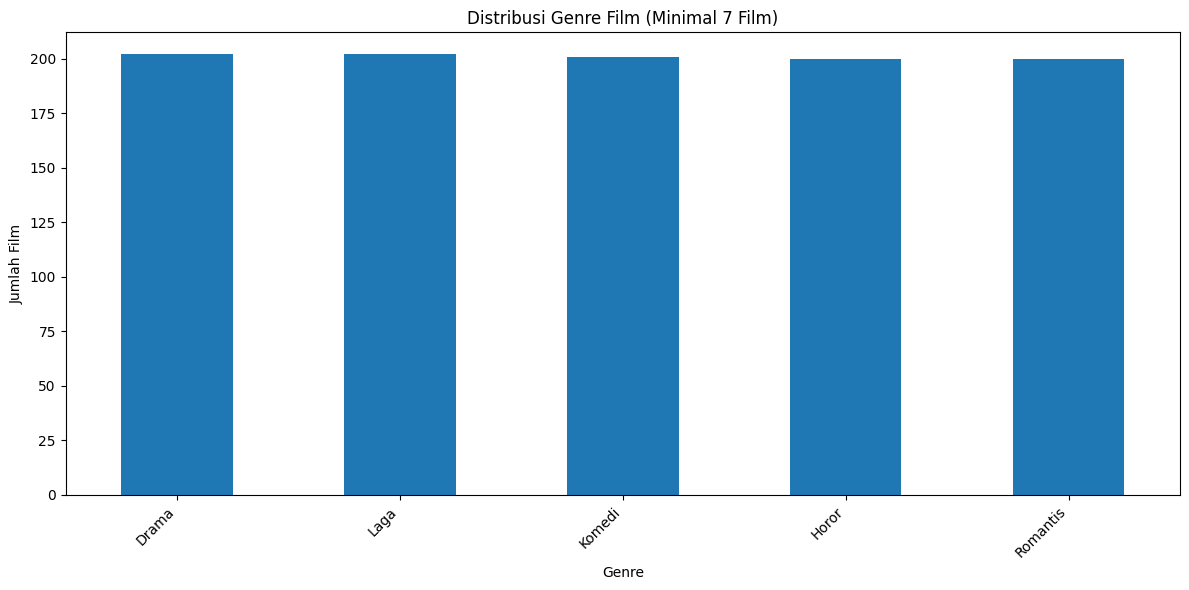

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Datasets/imdb_indonesian_movies_2.csv')

# Fungsi untuk membersihkan data dan memfilter genre
def clean_and_filter_genres(df, min_movies=7):
    # Pilih dan rename kolom yang diinginkan
    cleaned_df = df[['judul_film', 'ringkasan_sinopsis', 'genre']].copy()
    cleaned_df = cleaned_df.rename(columns={
        'judul_film': 'film',
        'ringkasan_sinopsis': 'sinopsis'
    })

    # Hapus baris yang mengandung nilai null
    cleaned_df = cleaned_df.dropna()

    # Hapus baris dimana genre atau sinopsis kosong/whitespace
    cleaned_df = cleaned_df[cleaned_df['genre'].str.strip() != '']
    cleaned_df = cleaned_df[cleaned_df['sinopsis'].str.strip() != '']

    # Bersihkan genre
    def clean_genre(genre_string):
        # Hapus karakter khusus dan standardisasi
        if pd.isna(genre_string):
            return ''

        genres = str(genre_string).split('|')
        cleaned_genres = []
        for genre in genres:
            # Bersihkan setiap genre
            cleaned_genre = genre.strip()
            # Hapus tanda kutip, kurung siku, dan tanda koma
            cleaned_genre = cleaned_genre.replace("'", "").replace('"', "").replace('[', '').replace(']', '').replace(',', '')
            # Hapus kata 'atau'
            if cleaned_genre.lower() != 'atau' and 'atau' not in cleaned_genre.lower():
                # Standardisasi format genre yang sama
                if 'Comedy' in cleaned_genre:
                    cleaned_genre = 'Komedi'
                elif 'Drama' in cleaned_genre:
                    cleaned_genre = 'Drama'
                elif 'Horror' in cleaned_genre or 'Horor' in cleaned_genre:
                    cleaned_genre = 'Horor'
                elif 'Biography' in cleaned_genre:
                    cleaned_genre = 'Biografi'
                elif 'Thriller' in cleaned_genre:
                    cleaned_genre = 'Thriller'
                elif 'Adventure' in cleaned_genre:
                    cleaned_genre = 'Petualangan'
                cleaned_genres.append(cleaned_genre)
        return ' | '.join(filter(None, cleaned_genres))

    # Terapkan pembersihan genre
    cleaned_df['genre'] = cleaned_df['genre'].apply(clean_genre)

    # Hapus baris yang mungkin kosong setelah pembersihan
    cleaned_df = cleaned_df[cleaned_df['genre'] != '']

    # Analisis Genre
    all_genres = cleaned_df['genre'].str.split(' | ').explode()

    # Hitung frekuensi setiap genre
    genre_counts = all_genres.value_counts()

    # Filter genre yang memiliki jumlah film >= min_movies
    valid_genres = genre_counts[genre_counts >= min_movies].index.tolist()

    # Filter dataset untuk hanya menyimpan film dengan genre yang valid
    filtered_df = cleaned_df.copy()
    mask = filtered_df['genre'].apply(lambda x: any(genre in valid_genres for genre in x.split(' | ')))
    filtered_df = filtered_df[mask]

    # Update genre dengan hanya menggunakan genre yang valid
    filtered_df['genre'] = filtered_df['genre'].apply(
        lambda x: ' | '.join([g for g in x.split(' | ') if g in valid_genres])
    )

    # Hapus film yang mungkin tidak memiliki genre setelah filtering
    filtered_df = filtered_df[filtered_df['genre'] != '']

    # Reset index
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df, genre_counts[genre_counts >= min_movies]

# Bersihkan dan filter data
cleaned_df, filtered_genre_counts = clean_and_filter_genres(df, min_movies=7)

# Tampilkan hasil
print("Jumlah data setelah dibersihkan dan filtering:", len(cleaned_df))

print("\nGenre yang tersisa (jumlah film >= 7):")
for genre, count in filtered_genre_counts.items():
    print(f"{genre}: {count} film")

# Simpan hasil
output_path = '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies_2.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"\nData telah disimpan di: {output_path}")

# Visualisasi distribusi genre yang tersisa
plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar')
plt.title('Distribusi Genre Film (Minimal 7 Film)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clean Datasets All

Loading datasets...
Error loading /content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_tmdb_movie_data.csv: Error tokenizing data. C error: Expected 1 fields in line 3, saw 7

Cleaning datasets...
Combining datasets...

Statistik Dataset Akhir:
Total film: 1738

Distribusi Genre:


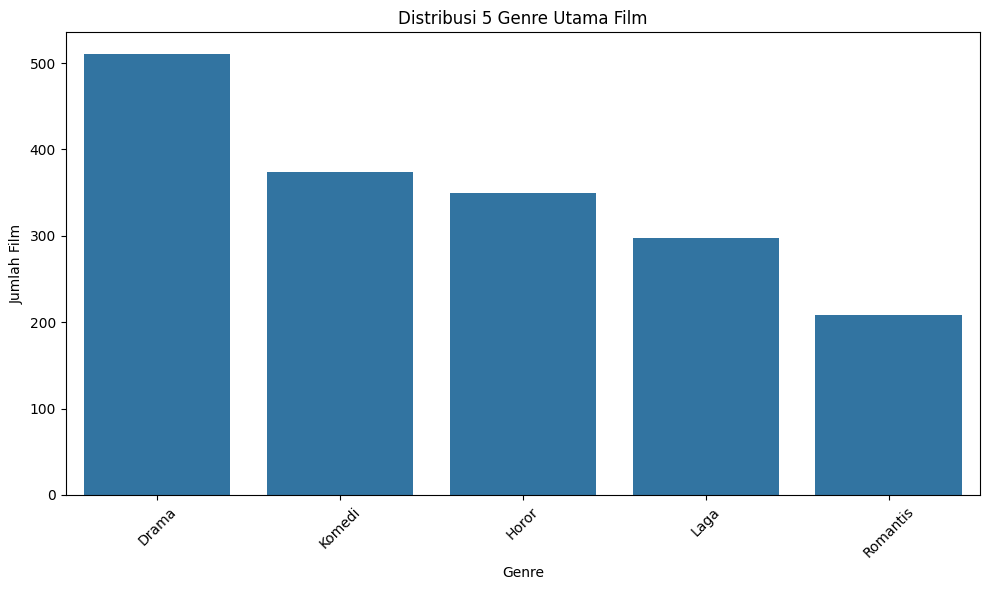

genre
Drama       510
Komedi      374
Horor       349
Laga        297
Romantis    208
Name: count, dtype: int64

Contoh Film per Genre:

Drama:
Film: Doa yang Mengancam

Komedi:
Film: Coblos cinta

Horor:
Film: Kuntilanak 1

Laga:
Film: Koki-Koki Cilik

Romantis:
Film: #TemanTapiMenikah

Dataset final telah disimpan di: /content/drive/MyDrive/Skripsi/Datasets/final_combined_movie_data_5genres.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_datasets(paths):
    """
    Load multiple datasets and return them in a list
    """
    datasets = []
    for path in paths:
        try:
            df = pd.read_csv(path)
            datasets.append(df)
        except Exception as e:
            print(f"Error loading {path}: {e}")
    return datasets

def standardize_genre_names(genre):
    """
    Standardize genre names to only 5 main genres
    """
    genre = str(genre).lower().strip()

    # Mapping untuk 5 genre utama
    main_genres = {
        'drama': 'Drama',
        'komedi': 'Komedi',
        'comedy': 'Komedi',
        'horor': 'Horor',
        'horror': 'Horor',
        'laga': 'Laga',
        'action': 'Laga',
        'romantis': 'Romantis',
        'romance': 'Romantis'
    }

    # Split genre jika ada multiple genres
    genres = [g.strip() for g in genre.split('|')]

    # Ambil genre yang termasuk dalam 5 genre utama
    standardized_genres = []
    for g in genres:
        g = g.strip()
        if g in main_genres:
            standardized_genres.append(main_genres[g])

    # Jika ada multiple genre, prioritaskan genre pertama yang masuk 5 genre utama
    return standardized_genres[0] if standardized_genres else None

def clean_dataset(df):
    """
    Clean individual dataset
    """
    df_cleaned = df.copy()

    # Standardize column names
    column_mapping = {
        'judul': 'film',
        'judul_film': 'film',
        'title': 'film',
        'ringkasan_sinopsis': 'sinopsis',
        'description': 'sinopsis'
    }

    df_cleaned = df_cleaned.rename(columns=column_mapping)

    # Ensure required columns exist
    required_columns = ['film', 'sinopsis', 'genre']
    for col in required_columns:
        if col not in df_cleaned.columns:
            print(f"Warning: Required column {col} missing")
            return None

    # Clean data
    df_cleaned = df_cleaned[required_columns]
    df_cleaned = df_cleaned.dropna()

    # Standardize genres
    df_cleaned['genre'] = df_cleaned['genre'].apply(standardize_genre_names)

    # Remove rows where genre is None (not in main genres)
    df_cleaned = df_cleaned.dropna(subset=['genre'])

    return df_cleaned

def combine_datasets(datasets):
    """
    Combine datasets and remove duplicates
    """
    # Combine all datasets
    combined_df = pd.concat(datasets, ignore_index=True)

    # Remove duplicates based on film title and synopsis
    combined_df = combined_df.drop_duplicates(subset=['film', 'sinopsis'])

    return combined_df

def plot_genre_distribution(df):
    """
    Plot genre distribution
    """
    plt.figure(figsize=(10, 6))
    genre_counts = df['genre'].value_counts()
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title('Distribusi 5 Genre Utama Film')
    plt.xlabel('Genre')
    plt.ylabel('Jumlah Film')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return genre_counts

# Main execution
if __name__ == "__main__":
    # Define paths
    paths = [
       # '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_filmindonesia_movie_data.csv',
        '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies.csv',
        '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_imdb_indonesian_movies_2.csv',
        '/content/drive/MyDrive/Skripsi/Datasets/cleaned_filtered_tmdb_movie_data.csv'
    ]

    # Load datasets
    print("Loading datasets...")
    datasets = load_datasets(paths)

    # Clean individual datasets
    print("Cleaning datasets...")
    cleaned_datasets = []
    for df in datasets:
        cleaned_df = clean_dataset(df)
        if cleaned_df is not None:
            cleaned_datasets.append(cleaned_df)

    # Combine datasets
    print("Combining datasets...")
    final_df = combine_datasets(cleaned_datasets)

    # Print statistics
    print("\nStatistik Dataset Akhir:")
    print(f"Total film: {len(final_df)}")
    print("\nDistribusi Genre:")
    genre_counts = plot_genre_distribution(final_df)
    print(genre_counts)

    # Print sample from each genre
    print("\nContoh Film per Genre:")
    for genre in genre_counts.index:
        sample = final_df[final_df['genre'] == genre].sample(1)
        print(f"\n{genre}:")
        print(f"Film: {sample['film'].values[0]}")

    # Save final dataset
    output_path = '/content/drive/MyDrive/Skripsi/Datasets/final_combined_movie_data_5genres.csv'
    final_df.to_csv(output_path, index=False)
    print(f"\nDataset final telah disimpan di: {output_path}")

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Aktifkan tqdm untuk pandas
tqdm.pandas()

def translate_text(text, source='en', target='id', max_retries=3, delay=1):
    """
    Menerjemahkan teks dengan penanganan error dan delay
    """
    for attempt in range(max_retries):
        try:
            time.sleep(delay)
            translated = GoogleTranslator(source=source, target=target).translate(text)
            return translated
        except Exception as e:
            print(f"Error pada percobaan {attempt + 1}: {str(e)}")
            if attempt == max_retries - 1:
                return text
            time.sleep(delay * (attempt + 1))

def plot_statistics(df):
    """
    Membuat visualisasi statistik dataset
    """
    try:
        # Plot distribusi genre
        plt.figure(figsize=(12, 6))
        genre_counts = df['genre'].value_counts()
        sns.barplot(x=genre_counts.index, y=genre_counts.values)
        plt.title('Distribusi Genre Film')
        plt.xlabel('Genre')
        plt.ylabel('Jumlah Film')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Hitung dan plot rata-rata panjang sinopsis
        plt.figure(figsize=(10, 5))
        avg_synopsis_length = df.groupby('genre')['sinopsis'].apply(lambda x: x.str.len().mean())
        sns.barplot(x=avg_synopsis_length.index, y=avg_synopsis_length.values)
        plt.title('Rata-rata Panjang Sinopsis per Genre')
        plt.xlabel('Genre')
        plt.ylabel('Rata-rata Jumlah Karakter')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Tampilkan statistik tambahan
        print("\nStatistik Lengkap:")
        print(f"Total film: {len(df)}")
        print("\nDistribusi Genre:")
        print(genre_counts)
        print("\nRata-rata panjang sinopsis per genre:")
        print(avg_synopsis_length.round(2))

    except Exception as e:
        print(f"Error dalam pembuatan visualisasi: {e}")

def translate_csv(input_file, output_file):
    """
    Membaca file CSV, menerjemahkan kolom sinopsis, dan menyimpan hasilnya
    """
    try:
        # Baca file CSV
        print("Membaca file CSV...")
        df = pd.read_csv(input_file)
        print(f"Berhasil membaca {len(df)} baris data")

        # Tampilkan statistik awal
        print("\nStatistik Dataset Sebelum Terjemahan:")
        plot_statistics(df)

        # Terjemahkan kolom sinopsis dengan progress bar
        print("\nMemulai proses penerjemahan...")
        df['sinopsis'] = df['sinopsis'].progress_apply(
            lambda x: translate_text(x, source='en', target='id')
        )

        # Tampilkan statistik setelah terjemahan
        print("\nStatistik Dataset Setelah Terjemahan:")
        plot_statistics(df)

        # Simpan hasil ke file baru
        print("\nMenyimpan hasil terjemahan...")
        df.to_csv(output_file, index=False)
        print(f"Penerjemahan selesai! Hasil tersimpan di {output_file}")

        # Tampilkan sample hasil terjemahan
        print("\nContoh Hasil Terjemahan:")
        sample_data = df.sample(min(3, len(df)))
        for _, row in sample_data.iterrows():
            print(f"\nFilm: {row['film']}")
            print(f"Genre: {row['genre']}")
            print(f"Sinopsis: {row['sinopsis'][:200]}...")

    except Exception as e:
        print(f"Error dalam memproses file: {str(e)}")

# Penggunaan
if __name__ == "__main__":
    input_file = "/content/drive/MyDrive/Skripsi/Datasets/final_combined_movie_data_5genres.csv"
    output_file = "/content/drive/MyDrive/Skripsi/Datasets/final_combined_movies_5genres.csv.csv"

    translate_csv(input_file, output_file)